<a href="https://colab.research.google.com/github/Vivisteria11/Anemia-detection-Model/blob/main/anemia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle (2).json to kaggle (2) (2).json


{'kaggle (2) (2).json': b'{"username":"rakshitav","key":"24568ffec3226e3e4a2dc4fbbb365032"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# 1. Install kagglehub (if not already installed)
!pip install kagglehub --upgrade

# 2. Import kagglehub
import kagglehub

# 3. Download the dataset (latest version)
path = kagglehub.dataset_download("t2obd1a1253kmit/clean-augmented-anemia-dataset")

# 4. Print the path to your dataset
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/clean-augmented-anemia-dataset


In [ ]:
import os

# Show entire directory structure
for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    sub_indent = ' ' * 2 * (level + 1)
    for file in files[:5]:  # Only list first 5 files per folder
        print(f"{sub_indent}{file}")


clean-augmented-anemia-dataset/
  New_Augmented_Anemia_Dataset/
    Conjuctiva/
      Validation/
        Non-Anemic/
          Non-Anemic-073_aug19.png
          Non-Anemic-148_aug6.png
          Non-Anemic-159_aug4.png
          Non-Anemic-023_aug10.png
          Non-Anemic-061_aug4.png
        Anemic/
          Anemic-138_aug1.png
          Anemic-161_aug15.png
          Anemic-113_aug6.png
          Anemic-204_aug7.png
          Anemic-Conj-026_aug2.png
      Training/
        Non-Anemic/
          Non-Anemic-145_aug10.png
          Non-Anemic-027_aug17.png
          Non-Anemic-200_aug10.png
          Non-Anemic-044_aug3.png
          Non-Anemic-098_aug12.png
        Anemic/
          Anemic-097_aug2.png
          Anemic-221 - Copy_aug6.png
          Anemic-148_aug7.png
          Anemic-034_aug3.png
          Anemic-147_aug8.png
      Testing/
        Non-Anemic/
          Non-Anemic-095_aug19.png
          Non-Anemic-011 - Copy_aug1.png
          Non-anemic-Con-011_aug23.png
     


📁 Training/Anemic — 4219 images


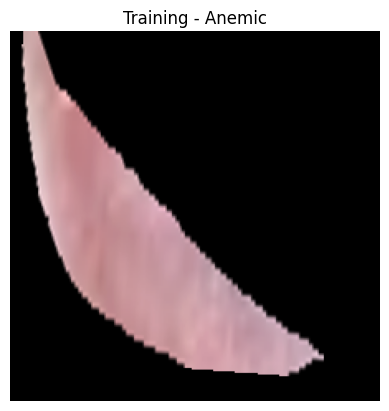


📁 Training/Non-Anemic — 4037 images


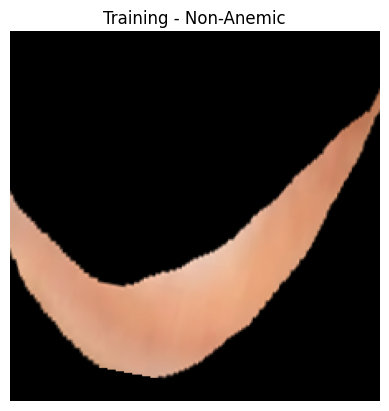


📁 Validation/Anemic — 500 images


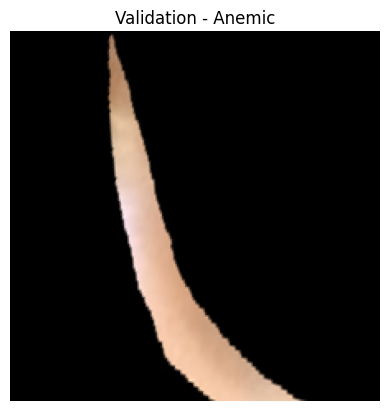


📁 Validation/Non-Anemic — 500 images


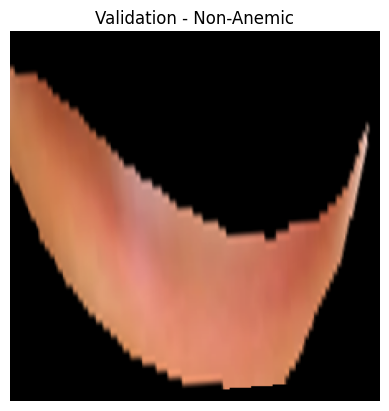


📁 Testing/Anemic — 500 images


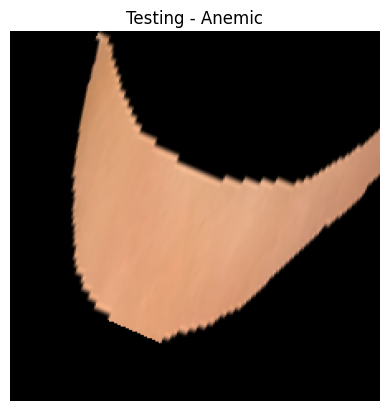


📁 Testing/Non-Anemic — 500 images


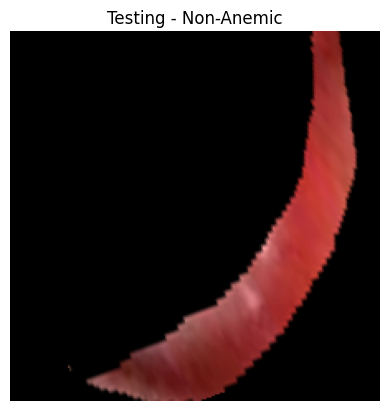

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Update this to the correct path
conj_path = os.path.join(path, "New_Augmented_Anemia_Dataset", "Conjuctiva")

# List of phases and classes
phases = ['Training', 'Validation', 'Testing']
classes = ['Anemic', 'Non-Anemic']

# List images from each split and class
for phase in phases:
    for label in classes:
        folder = os.path.join(conj_path, phase, label)
        image_files = os.listdir(folder)
        print(f"\n📁 {phase}/{label} — {len(image_files)} images")

        # Show first image
        img_path = os.path.join(folder, image_files[0])
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f"{phase} - {label}")
        plt.axis("off")
        plt.show()


In [ ]:
import os
import shutil

# Define paths
dataset_path = "/root/.cache/kagglehub/datasets/t2obd1a1253kmit/clean-augmented-anemia-dataset/versions/1"
src_conj_path = os.path.join(dataset_path, "New_Augmented_Anemia_Dataset", "Conjuctiva")
anemia_dataset = "/content/Conjunctiva_Images_Only"

# Create new directory if it doesn't exist
os.makedirs(anemia_dataset, exist_ok=True)

# Copy each image while preserving subfolders (Train/Val/Test + Anemic/Non-Anemic)
for phase in ['Training', 'Validation', 'Testing']:
    for label in ['Anemic', 'Non-Anemic']:
        src_folder = os.path.join(src_conj_path, phase, label)
        dest_folder = os.path.join(anemia_dataset, phase, label)
        os.makedirs(dest_folder, exist_ok=True)

        for file in os.listdir(src_folder):
            src_file = os.path.join(src_folder, file)
            dest_file = os.path.join(dest_folder, file)
            shutil.copy(src_file, dest_file)

print("✅ Conjunctiva images extracted to:", anemia_dataset)


✅ Conjunctiva images extracted to: /content/Conjunctiva_Images_Only


In [ ]:
import tensorflow as tf
import os

# Define path to conjunctiva images
DATA_DIR = "/content/Conjunctiva_Images_Only"

# Image and training parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "Training"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "Validation"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "Testing"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

Found 8256 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the base

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    data_augmentation,  # Add augmentation before input
    tf.keras.layers.Rescaling(1./255),  # Normalize pixel values
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classifier
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)

Epoch 1/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - accuracy: 0.5302 - loss: 0.7494 - val_accuracy: 0.6160 - val_loss: 0.6461
Epoch 2/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.6020 - loss: 0.6697 - val_accuracy: 0.6380 - val_loss: 0.6202
Epoch 3/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.6148 - loss: 0.6553 - val_accuracy: 0.6580 - val_loss: 0.6072
Epoch 4/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.6350 - loss: 0.6387 - val_accuracy: 0.6710 - val_loss: 0.5999
Epoch 5/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.6493 - loss: 0.6237 - val_accuracy: 0.6900 - val_loss: 0.5839
Epoch 6/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.6465 - loss: 0.6267 - val_accuracy: 0.6840 - val_loss: 0.5864
Epoch 7/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.6531 - loss: 0.6177 - val_accuracy: 0.6790 - val_loss: 0.5835
Epoch 8/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.6570 - loss: 0.6152 - 

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6799 - loss: 0.5852
✅ Test Accuracy: 0.6860


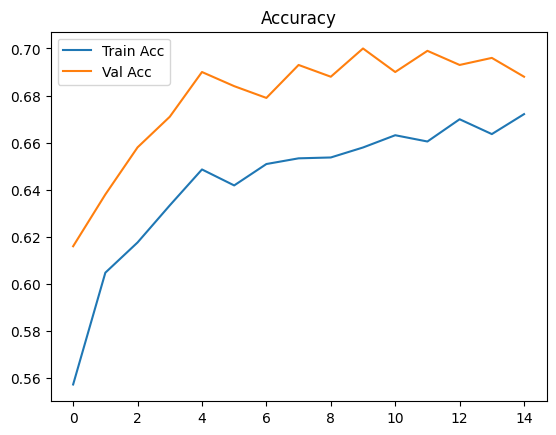

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"✅ Test Accuracy: {test_acc:.4f}")
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step
              precision    recall  f1-score   support

      Normal       0.64      0.85      0.73       500
      Anemia       0.78      0.52      0.62       500

    accuracy                           0.69      1000
   macro avg       0.71      0.69      0.68      1000
weighted avg       0.71      0.69      0.68      1000



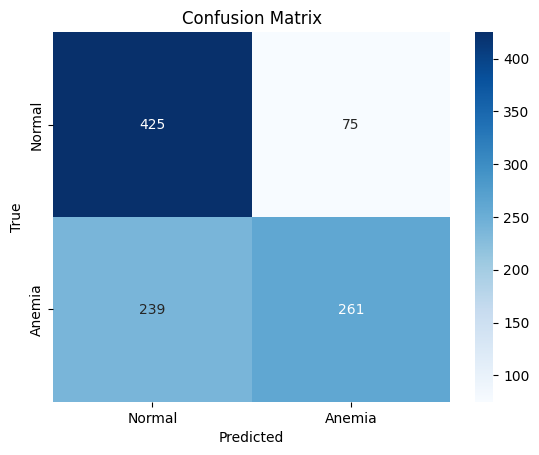

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get true labels and predictions
true_labels = np.concatenate([y for x, y in test_ds], axis=0)
pred_probs = model.predict(test_ds)
pred_labels = (pred_probs > 0.5).astype(int)

# Print classification report
print(classification_report(true_labels, pred_labels, target_names=['Normal', 'Anemia']))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anemia'], yticklabels=['Normal', 'Anemia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Class weights: {0: np.float64(0.9784309077980564), 1: np.float64(1.0225414912063413)}
Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.5171 - loss: 0.0760 - val_accuracy: 0.5880 - val_loss: 0.0454
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.5555 - loss: 0.0531 - val_accuracy: 0.5910 - val_loss: 0.0418
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - accuracy: 0.5598 - loss: 0.0477 - val_accuracy: 0.6010 - val_loss: 0.0414
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.5763 - loss: 0.0446 - val_accuracy: 0.5860 - val_loss: 0.0418
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.6101 - loss: 0.0430 - val_accuracy: 0.5660 - val_loss: 0.0451
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.5793 - loss: 0.0438 - val_accuracy: 0.5770 - val_loss: 0.0429
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.5953 - loss: 0.0429 - val_accuracy: 0.6200 - val_loss: 0.0406
Epoc

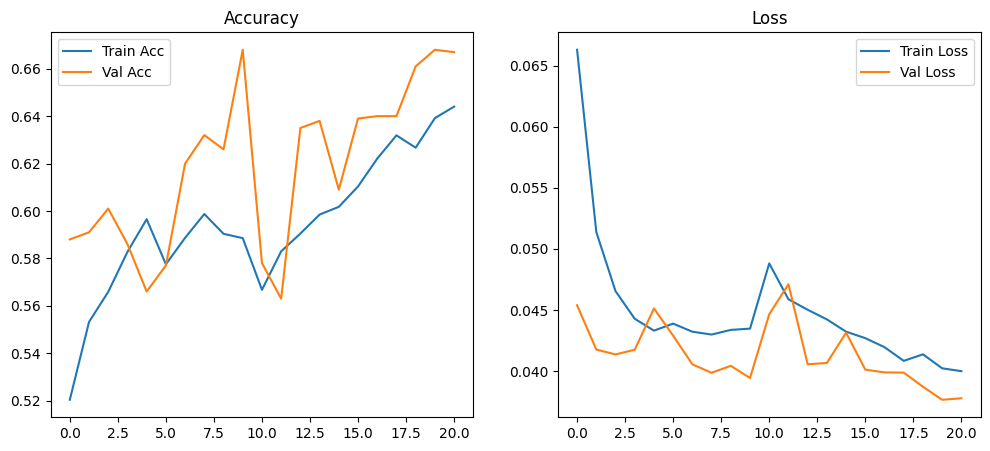

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

# 1. Data Augmentation (stronger)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
    layers.RandomContrast(0.2),
])

# 2. Load base model (MobileNetV2) and freeze all layers initially
IMG_SIZE = (224, 224)  # Adjust to your input size
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

# 3. Build the model
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# 4. Define Focal Loss function
def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        bce_exp = tf.exp(-bce)
        loss = alpha * tf.pow(1 - bce_exp, gamma) * bce
        return loss
    return focal_loss_fixed

# 5. Prepare class weights
# Extract labels from train_ds for computing class weights
train_labels = []
for _, label in train_ds.unbatch():
    # Convert tensor to numpy and get scalar class index if one-hot
    if len(label.shape) > 0 and label.shape[0] > 1:
        # If one-hot encoded vector, get argmax class index
        train_labels.append(np.argmax(label.numpy()))
    else:
        # If scalar label
        train_labels.append(label.numpy().item())
train_labels = np.array(train_labels)


class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights_dict = dict(enumerate(class_weights_array))
print("Class weights:", class_weights_dict)

# 6. Compile and train the model (initial training)
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=focal_loss(),
    metrics=['accuracy']
)

initial_epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=initial_epochs,
    class_weight=class_weights_dict
)

# 7. Fine-tune: unfreeze top layers of base_model
base_model.trainable = True

# Freeze all layers except the last 20 layers
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Recompile with lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss=focal_loss(),
    metrics=['accuracy']
)

fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    class_weight=class_weights_dict
)

# 8. Evaluate on test dataset
test_loss, test_acc = model.evaluate(test_ds)
print(f"✅ Test Accuracy: {test_acc:.4f}")

# 9. Plot accuracy and loss curves
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()